In [8]:
import glob
import h5py
import librosa
import numpy as np
import os
import scipy
import sklearn
import sys
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import librosa.feature
import librosa.display

sys.path.append("..")
import localmodule
np.random.seed(2)

In [2]:
# select participants and spcies
participant_paths = np.array(glob.glob("imitations_participant*.mat"))
participant_paths.sort()
#participant_paths = participant_paths[([0, 4, 5, 8, 10, 11])]

n_participants = len(participant_paths)
n_imitations = 100
n_species = 10
imitation_matrix = []
stimulus_matrix = []
species_matrix = []

for participant_path in tqdm.tqdm(participant_paths):
    imitation_list = []
    stimulus_list = []
    species_list = []
    
    with h5py.File(participant_path) as h5_file:
        for i in range(n_imitations):#imitation_subset:
            imitation_waveform = h5_file['#refs#'][
                h5_file["imitations"]["imitationAudio"][i][0]][0]
            stimulus_waveform = h5_file['#refs#'][
                h5_file["imitations"]["stimulusAudio"][i][0]][0]
            species = int(h5_file['#refs#'][
                h5_file["imitations"]["species"][i][0]][0][0])
            
            imitation_list.append(imitation_waveform)
            stimulus_list.append(stimulus_waveform)
            species_list.append(species)
            
        imitation_matrix.append(imitation_list)
        stimulus_matrix.append(stimulus_list)
        species_matrix.append(species_list)
        
imitation_matrix = np.array(imitation_matrix)
stimulus_matrix = np.array(stimulus_matrix)
stimulus_matrix = stimulus_matrix[0,:]
species_matrix = np.array(species_matrix)

n_species = int(stimulus_matrix.shape[0] / 10)
n_imitations = int(imitation_matrix.shape[0] * imitation_matrix.shape[1])
n_participants = imitation_matrix.shape[0]

100%|██████████| 17/17 [00:21<00:00,  1.27s/it]


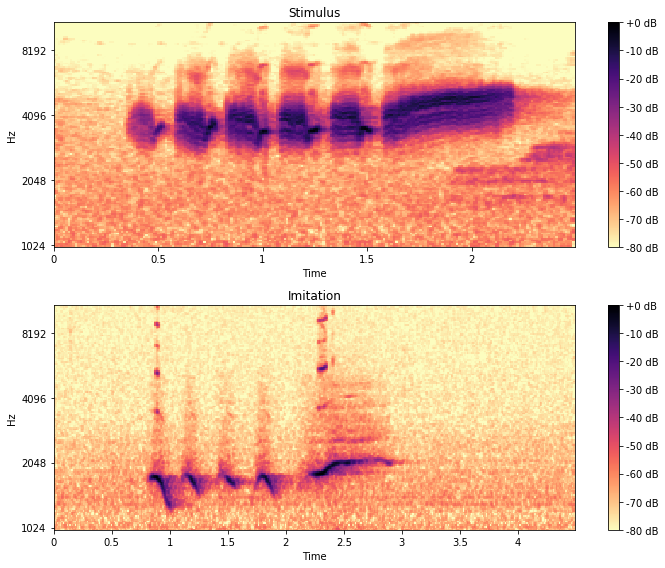

In [17]:
n_participant = 1-1
n_imitation = 11-1

imitation = imitation_matrix[n_participant, n_imitation]
stimulus = stimulus_matrix[n_imitation,]
species = species_matrix[n_participant, n_imitation]


sr = 44100
fmin=1000
fmax=11025
hop_length=512
n_mels=128

i = -1
for n_participant in [0,1]:
    for n_imitation in range(0,10):
    melspec_im = librosa.feature.melspectrogram(
        y=imitation, sr=sr, fmin=fmin, fmax=fmax, 
        hop_length=hop_length, n_mels=n_mels)

    melspec_st = librosa.feature.melspectrogram(
        y=stimulus, sr=sr, fmin=fmin, fmax=fmax, 
        hop_length=hop_length, n_mels=n_mels)

    plt.figure(figsize=(10,8))

    
    plt.subplot(2, 1, 1)
    librosa.display.specshow(
        librosa.power_to_db(S=melspec_st, ref=np.max),
            sr=sr,fmin=fmin, fmax=fmax,
            x_axis='time', y_axis='mel', cmap='magma_r')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Stimulus')

    plt.subplot(2, 1, 2)
    librosa.display.specshow(
        librosa.power_to_db(S=melspec_im, ref=np.max),
            sr=sr,fmin=fmin, fmax=fmax,
            x_axis='time', y_axis='mel', cmap='magma_r')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Imitation')

plt.tight_layout()